<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/ridge%2Classo%2Celastic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unemployment.csv to unemployment.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('unemployment.csv')

In [ ]:
df

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8
...,...,...
59,Gibraltar,1.0
60,Niger,0.8
61,Cambodia,0.6
62,Qatar,0.3


In [ ]:
df.isnull().sum()

,0
country,0
unemployment_rate,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            64 non-null     object 
 1   unemployment_rate  64 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['country']=le.fit_transform(df['country'])

In [ ]:
df

,country,unemployment_rate
0,36,36.0
1,51,33.6
2,30,30.6
3,31,30.5
4,0,29.8
...,...,...
59,20,1.0
60,39,0.8
61,8,0.6
62,46,0.3


In [ ]:
x=df.iloc[:,:-1]
y=df['unemployment_rate']

In [ ]:
x

,country
0,36
1,51
2,30
3,31
4,0
...,...
59,20
60,39
61,8
62,46


In [ ]:
y

,unemployment_rate
0,36.0
1,33.6
2,30.6
3,30.5
4,29.8
...,...
59,1.0
60,0.8
61,0.6
62,0.3


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
rr = Ridge(alpha=0.3)

In [ ]:
rr.fit(x_train,y_train)

Ridge(alpha=0.3)

In [ ]:
lr = Lasso(alpha=0.7)

In [ ]:
els = ElasticNet(alpha=0.3)

In [ ]:
els.fit(x_train,y_train)

ElasticNet(alpha=0.3)

In [ ]:
y_pred = rr.predict(x_test)

In [ ]:
lr.fit(x_train,y_train)

Lasso(alpha=0.7)

In [ ]:
y_pred_2 = lr.predict(x_test)

In [ ]:
y_pred_2

array([7.93000924, 7.87158794, 7.7742191 , 8.63106485, 8.53369602,
       8.57264355, 7.98843054, 8.04685184, 7.69632403, 7.8910617 ,
       8.31948458, 8.20264198, 8.24158951])

In [ ]:
y_pred_3 = els.predict(x_test)

In [ ]:
y_test

,unemployment_rate
45,3.4
29,5.2
43,3.5
61,0.6
34,4.8
33,4.8
31,5.0
40,4.0
26,5.3
62,0.3


In [ ]:
y_pred

array([7.90505064, 7.84089561, 7.73397055, 8.67491103, 8.56798598,
       8.610756  , 7.96920567, 8.03336071, 7.64843051, 7.86228062,
       8.33275086, 8.20444079, 8.24721082])

In [ ]:
y_pred_3

array([7.91051093, 7.84761029, 7.74277589, 8.66531863, 8.56048423,
       8.60241799, 7.97341157, 8.03631222, 7.65890837, 7.86857717,
       8.32984854, 8.20404726, 8.24598102])

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

56.640115471809445
5.402150848929685
-0.05022365819611063


In [ ]:
print(mean_squared_error(y_test,y_pred_2))
print(mean_absolute_error(y_test,y_pred_2))
print(r2_score(y_test,y_pred_2))

56.67101958805846
5.40854937718325
-0.05079668375847057


In [ ]:
print(mean_squared_error(y_test,y_pred_3))
print(mean_absolute_error(y_test,y_pred_3))
print(r2_score(y_test,y_pred_3))

56.646719640446996
5.403549811655692
-0.0503461129984728


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='country', ylabel='unemployment_rate'>

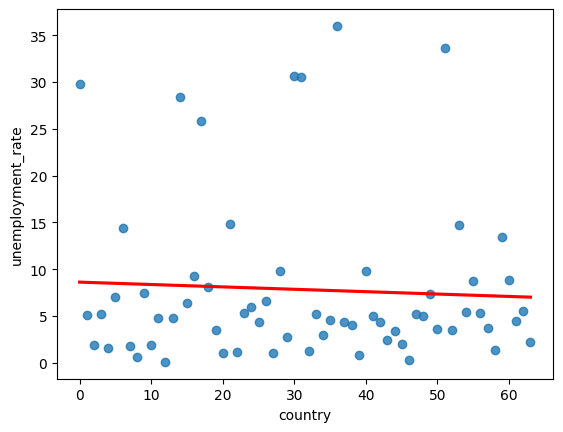

In [ ]:
sns.regplot(x='country',y = 'unemployment_rate', data = df, ci= None, line_kws={"color":"red"})